-------------------------------------------------------------------------------------------------------------------------------

# Regression
1. [Definition](#section1)<br>
2. [Simple Linear Regression](#section2)
3. [Multiple Linear Regression](#section3)




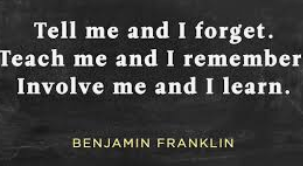

<a id=section1></f>
## Definition


Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.
- Simple Linear Regression

Simple linear regression is an approach for predicting a response using a single feature.
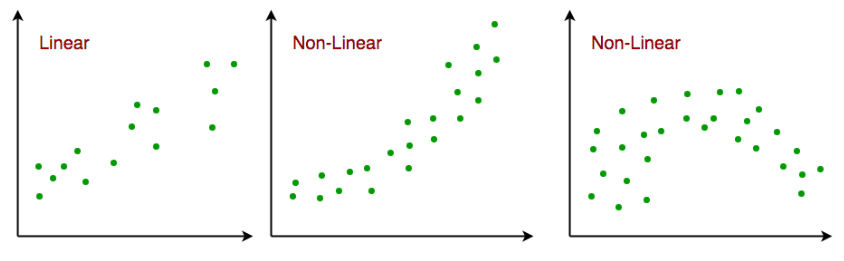

#### WHY Linear Regression?
- To find the parameters so that the model **best fits** the data.
- Forecasting an effect
- Determing a Trend
#### How do we determine the best fit line? 
- The line for which the the error between the **predicted** values and the **observed** values is minimum is called the best fit line or the regression line. These errors are also called as **residuals**. 
- The residuals can be visualized by the vertical lines from the observed data value to the **regression line**.

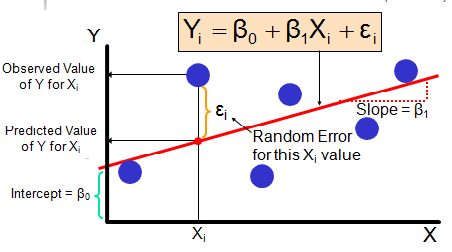



<a id=section2></f>
## Simple Linear Regression


- Lets  assume that the two variables are linearly related. 
- Find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

- x = [9, 10, 11, 12, 10, 9, 9, 10, 12, 11]
- y = [10, 11, 14, 13, 15, 11, 12, 11, 13, 15]


x as feature vector, i.e x = [x_1, x_2, …., x_n],

y as response vector, i.e y = [y_1, y_2, …., y_n]

for n observations (in above example, n=10).

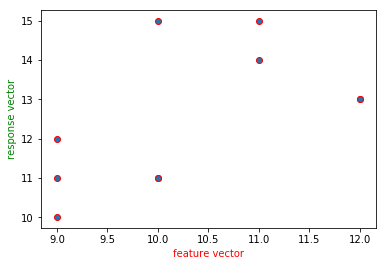

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
x = [9, 10, 11, 12, 10, 9, 9, 10, 12, 11]
y = [10, 11, 14, 13, 15, 11, 12, 11, 13, 15]

plt.scatter(x,y, edgecolors='r')
plt.xlabel('feature vector',color="r")
plt.ylabel('response vector',color="g")
plt.show()

- Now, the task is to find a line which fits best in above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in dataset)
This line is called regression line.

The equation of regression line is represented as:

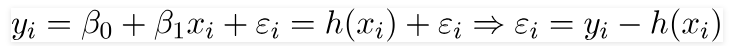

Here,

h(x<sub>i</sub>) represents the predicted response value for ith observation.
b(<sub>0</sub>) and b(<sub>1</sub>) are regression coefficients and represent y-intercept and slope of regression line respectively.

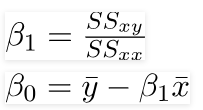
where (SS<sub>xx</sub>) is the sum of cross-deviations of y and x:

In [4]:
import numpy as np 
X=[1,2,3]
Y=[1,2,3]
x=np.array(X)
y=np.array(Y)
x+y
np.mean(x)

2.0

<a id=section3></f>
## Multiple linear regression


Multiple linear regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data.

Clearly, it is nothing but an extension of Simple linear regression.

Consider a dataset with p features(or independent variables) and one response(or dependent variable).
Also, the dataset contains n rows/observations.
The regression line for p features is represented as:
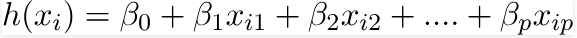
where h(x_i) is predicted response value for ith observation and b_0, b_1, …, b_p are the regression coefficients.

### Scikit -Learn
 - A library for machine learning for python language
 - Contains tools for machine learning algorithm and stats modelling
 
#### Installation
- conda install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'

In [3]:
c_data=pd.read_csv("https://raw.githubusercontent.com/suyashi29/python-su/master/ML/cars.csv")

In [4]:
c_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
c_data = c_data.replace('?', np.nan)
c_data = c_data.dropna()

In [6]:
eda_report = pandas_profiling.ProfileReport(c_data)
eda_report


Number of variables,10
Number of observations,392
Total Missing (%),0.0%
Total size in memory,30.7 KiB
Average record size in memory,80.2 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,3


In [7]:
## drop down following : the model name, the geographical origin and the year that the model was built. 
c_data = c_data.drop(['name','origin','model_year'], axis=1)
X = c_data.drop('mpg', axis=1)
y = c_data[['mpg']]


In [8]:
## we’ll split the dataset into a train set and a test set. 
## Scikit-learn has a very straightforward train_test_split function for that.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                  random_state=1)

###  Feature Importance for selection
One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. 

The correlation coefficient has values between -1 to 1
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

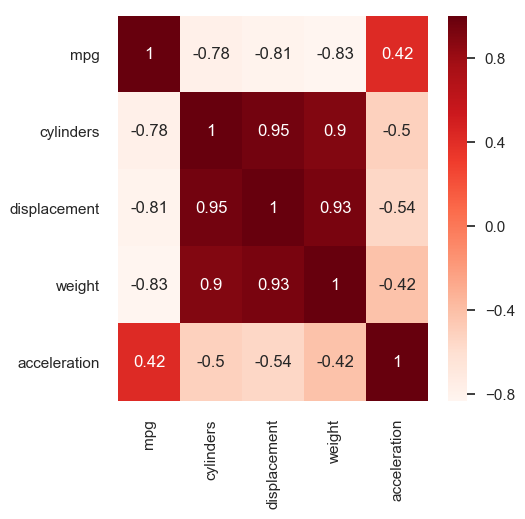

In [9]:
#Using Pearson Correlation
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.figure(figsize=(5,5))
cor = c_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
#Correlation with output variable
cor_target = abs(cor["mpg"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

mpg             1.000000
cylinders       0.777618
displacement    0.805127
weight          0.832244
Name: mpg, dtype: float64

- We see that all the above features are highly correlated.We can consider all above features
- One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest.

### Correlation of Selected features with each other

In [11]:
print(c_data[["cylinders","displacement"]].corr())
print(c_data[["cylinders","weight"]].corr())

              cylinders  displacement
cylinders      1.000000      0.950823
displacement   0.950823      1.000000
           cylinders    weight
cylinders   1.000000  0.897527
weight      0.897527  1.000000


### RFE (Recursive Feature Elimination)
The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [12]:
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 4)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)


[ True False  True  True  True]
[1 2 1 1 1]


In [13]:
#no of features
nof_list=np.arange(1,5)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 4
Score with 4 features: 0.680244


### Lets build the regression model. First, let’s try a model with only one variable.

In [14]:
reg = LinearRegression()
reg.fit(X_train[['cylinders']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print(reg.intercept_)  

[43.08185227]


In [16]:
print(reg.coef_)  

[[-3.62292664]]


In [17]:
y_predicted = reg.predict(X_test[['cylinders']])

###  Evaluation metrics for linear regression are mean squared error and the R² score.

In [18]:
print(reg.intercept_)

[43.08185227]


In [19]:
print(reg.coef_)

[[-3.62292664]]


In [20]:

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))  
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean Absolute Error: 3.907179779772608
Mean Squared Error: 27.02337112958722
Root Mean Squared Error: 5.198400824252322
R²: 0.56


- Linear regression calculates an equation that minimizes the distance between the fitted line and all of the data points.
- R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
- R-squared = Explained variation / Total variation

- R-squared is always between 0 and 100%:
0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data.

### Insights

- The **best** possible score is **1.0**, We get a model with a mean squared error of **27** and an R² of**0.56**. Not so good

### Let’s add more variables to the model weight and cylinders(Multi)

In [21]:
reg = LinearRegression()
reg.fit(X_train[['horsepower','weight','cylinders','displacement']], y_train)
y_predicted = reg.predict(X_test[['horsepower','weight','cylinders','displacement']])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))  
print('R²: %.2f' % r2_score(y_test, y_predicted))
#print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))


Mean Absolute Error: 3.3969028336055667
Mean Squared Error: 19.740840919859913
Root Mean Squared Error: 4.443066612134001
R²: 0.68


### Insights
- Now our Model is better as **R²= 0.68**